# Библиотеки

In [1]:
import statsmodels
import scipy as sc
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Данные

In [3]:
df = pd.read_csv('Life Expectancy Data.csv')
df

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


**Country** - страна

**Life expectancy** - Ожидаемая продолжительность жизни в годах

**Adult Mortality**  -  Показатели смертности взрослого населения обоих полов (вероятность смерти в возрасте от 15 до 60 лет на 1000 человек населения)

**infant deaths** - Число младенческих смертей на 1000 человек населения

**Alcohol** - Потребление алкоголя, зарегистрированное на душу населения (15+) (в литрах чистого алкоголя)

**percentage expenditure** - Расходы на здравоохранение в процентах от валового внутреннего продукта на душу населения (%)

**Hepatitis B** - Охват иммунизацией против гепатита В (HepB) среди детей в возрасте 1 года (%)

**Measles**  - число зарегистрированных случаев на 1000 человек населения 

**BMI** - Средний индекс массы тела всего населения

**under-five deaths** - Число смертей в возрасте до пяти лет на 1000 человек населения

**Polio**  - Охват иммунизацией от полиомиелита (Pol3) среди детей в возрасте 1 года (%)

**Total expenditure** - Общие государственные расходы на здравоохранение в процентах от общих государственных расходов (%)

**Diphtheria** - Охват иммунизацией против дифтерии, столбнячного анатоксина и коклюша (DTP3) среди детей в возрасте до 1 года (%)

**HIV/AIDS** - Смертность на 1 000 живорождений ВИЧ/СПИД (0-4 года)

**GDP** - Валовой внутренний продукт на душу населения (в долларах США)

**Population** - Население страны

**thinness 1-19 years** - Распространенность худобы среди детей и подростков в возрасте от 10 до 19 лет (%)

**thinness 5-9 years** - Распространенность худобы среди детей в возрасте от 5 до 9 лет (%)

**Income composition of resources** - Индекс развития человеческого потенциала с точки зрения структуры доходов и ресурсов (индекс в диапазоне от 0 до 1)

**Schooling** - Количество лет обучения в школе (лет)

Так как данные представлены для одной и той же страны для разных лет - выберем 2015 год и оставим только его, чтоб выборка стала пространственной и "одновременной" 

In [4]:
df_n = df[df.Year == 2015]
df_n

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.000000,87.0,0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.000000,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.000000,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.000000,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [5]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 0 to 2922
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          183 non-null    object 
 1   Year                             183 non-null    int64  
 2   Status                           183 non-null    object 
 3   Life_expectancy                  183 non-null    float64
 4   Adult_Mortality                  183 non-null    float64
 5   infant_deaths                    183 non-null    int64  
 6   Alcohol                          6 non-null      float64
 7   percentage_expenditure           183 non-null    float64
 8   Hepatitis_B                      174 non-null    float64
 9   Measles                          183 non-null    int64  
 10  BMI                              181 non-null    float64
 11  under_five_deaths                183 non-null    int64  
 12  Polio                     

В данных осталось 183 страны, по статистике можно заметить, что в некоторых переменных есть пропущенные данные.
Например:
1) в колонке Alcocol содержится лишь 6 значений из 183 - удалим ее 
2) в колонке Total expenditure содержится лишь 2 значения из 183 - удалим ее 

In [6]:
df_n = df_n.drop(columns='Alcohol')
df_n = df_n.drop(columns='Total_expenditure')

In [7]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 0 to 2922
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          183 non-null    object 
 1   Year                             183 non-null    int64  
 2   Status                           183 non-null    object 
 3   Life_expectancy                  183 non-null    float64
 4   Adult_Mortality                  183 non-null    float64
 5   infant_deaths                    183 non-null    int64  
 6   percentage_expenditure           183 non-null    float64
 7   Hepatitis_B                      174 non-null    float64
 8   Measles                          183 non-null    int64  
 9   BMI                              181 non-null    float64
 10  under_five_deaths                183 non-null    int64  
 11  Polio                            183 non-null    float64
 12  Diphtheria                

Также можно заметить, что не во всех колонках присутствуют все данные, почистим такие строки, в которых отсутствуют данные

In [8]:
df_n = df_n.dropna(subset=['Population'])
df_n = df_n.dropna(subset=['Hepatitis_B'])
df_n = df_n.dropna(subset=['BMI'])
df_n = df_n.dropna(subset=['GDP'])
df_n = df_n.dropna(subset=['Life_expectancy'])
df_n = df_n.dropna(subset=['Adult_Mortality'])
df_n = df_n.dropna(subset=['GDP'])
df_n = df_n.drop(['Year', 'Status','under_five_deaths',  'Country'], axis=1) 
df_n = df_n.drop(columns = 'thinness_5_9_years')


In [9]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 0 to 2922
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life_expectancy                  130 non-null    float64
 1   Adult_Mortality                  130 non-null    float64
 2   infant_deaths                    130 non-null    int64  
 3   percentage_expenditure           130 non-null    float64
 4   Hepatitis_B                      130 non-null    float64
 5   Measles                          130 non-null    int64  
 6   BMI                              130 non-null    float64
 7   Polio                            130 non-null    float64
 8   Diphtheria                       130 non-null    float64
 9   HIV_AIDS                         130 non-null    float64
 10  GDP                              130 non-null    float64
 11  Population                       130 non-null    float64
 12  thinness_1_19_years       

In [10]:
df_n.describe()

,Life_expectancy,Adult_Mortality,infant_deaths,percentage_expenditure,Hepatitis_B,Measles,BMI,Polio,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_19_years,Income_composition_of_resources,Schooling
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02,130.000000,130.000000,130.000000
mean,70.741538,158.676923,27.723077,3.355807,80.653846,1773.315385,40.533077,81.123077,82.846154,0.785385,5997.928670,1.163121e+07,4.680769,0.674792,12.746923
std,7.997381,99.484969,96.426702,32.567606,24.992933,9130.704172,21.196345,25.435133,23.289370,1.520206,10101.952401,3.017667e+07,4.380632,0.151216,2.760159
min,51.000000,1.000000,0.000000,0.000000,6.000000,0.000000,2.500000,6.000000,6.000000,0.100000,33.681223,2.966000e+03,0.100000,0.347000,5.400000
25%,65.725000,79.000000,0.000000,0.000000,77.250000,0.000000,23.325000,78.250000,78.000000,0.100000,702.333884,2.423205e+05,1.525000,0.550500,10.800000
50%,72.150000,145.500000,3.000000,0.000000,91.000000,16.500000,41.300000,91.500000,92.500000,0.100000,2231.867706,1.894576e+06,3.400000,0.701500,12.750000
75%,76.025000,215.000000,20.500000,0.000000,96.000000,210.500000,61.200000,97.000000,97.000000,0.500000,6311.780768,1.095208e+07,6.500000,0.784000,14.675000
max,85.000000,484.000000,910.000000,364.975229,99.000000,90387.000000,77.600000,99.000000,99.000000,9.300000,56554.387600,2.581621e+08,26.700000,0.937000,20.400000


# Визуализация

Построим ящичковые диаграммы для обнаружения выбросов

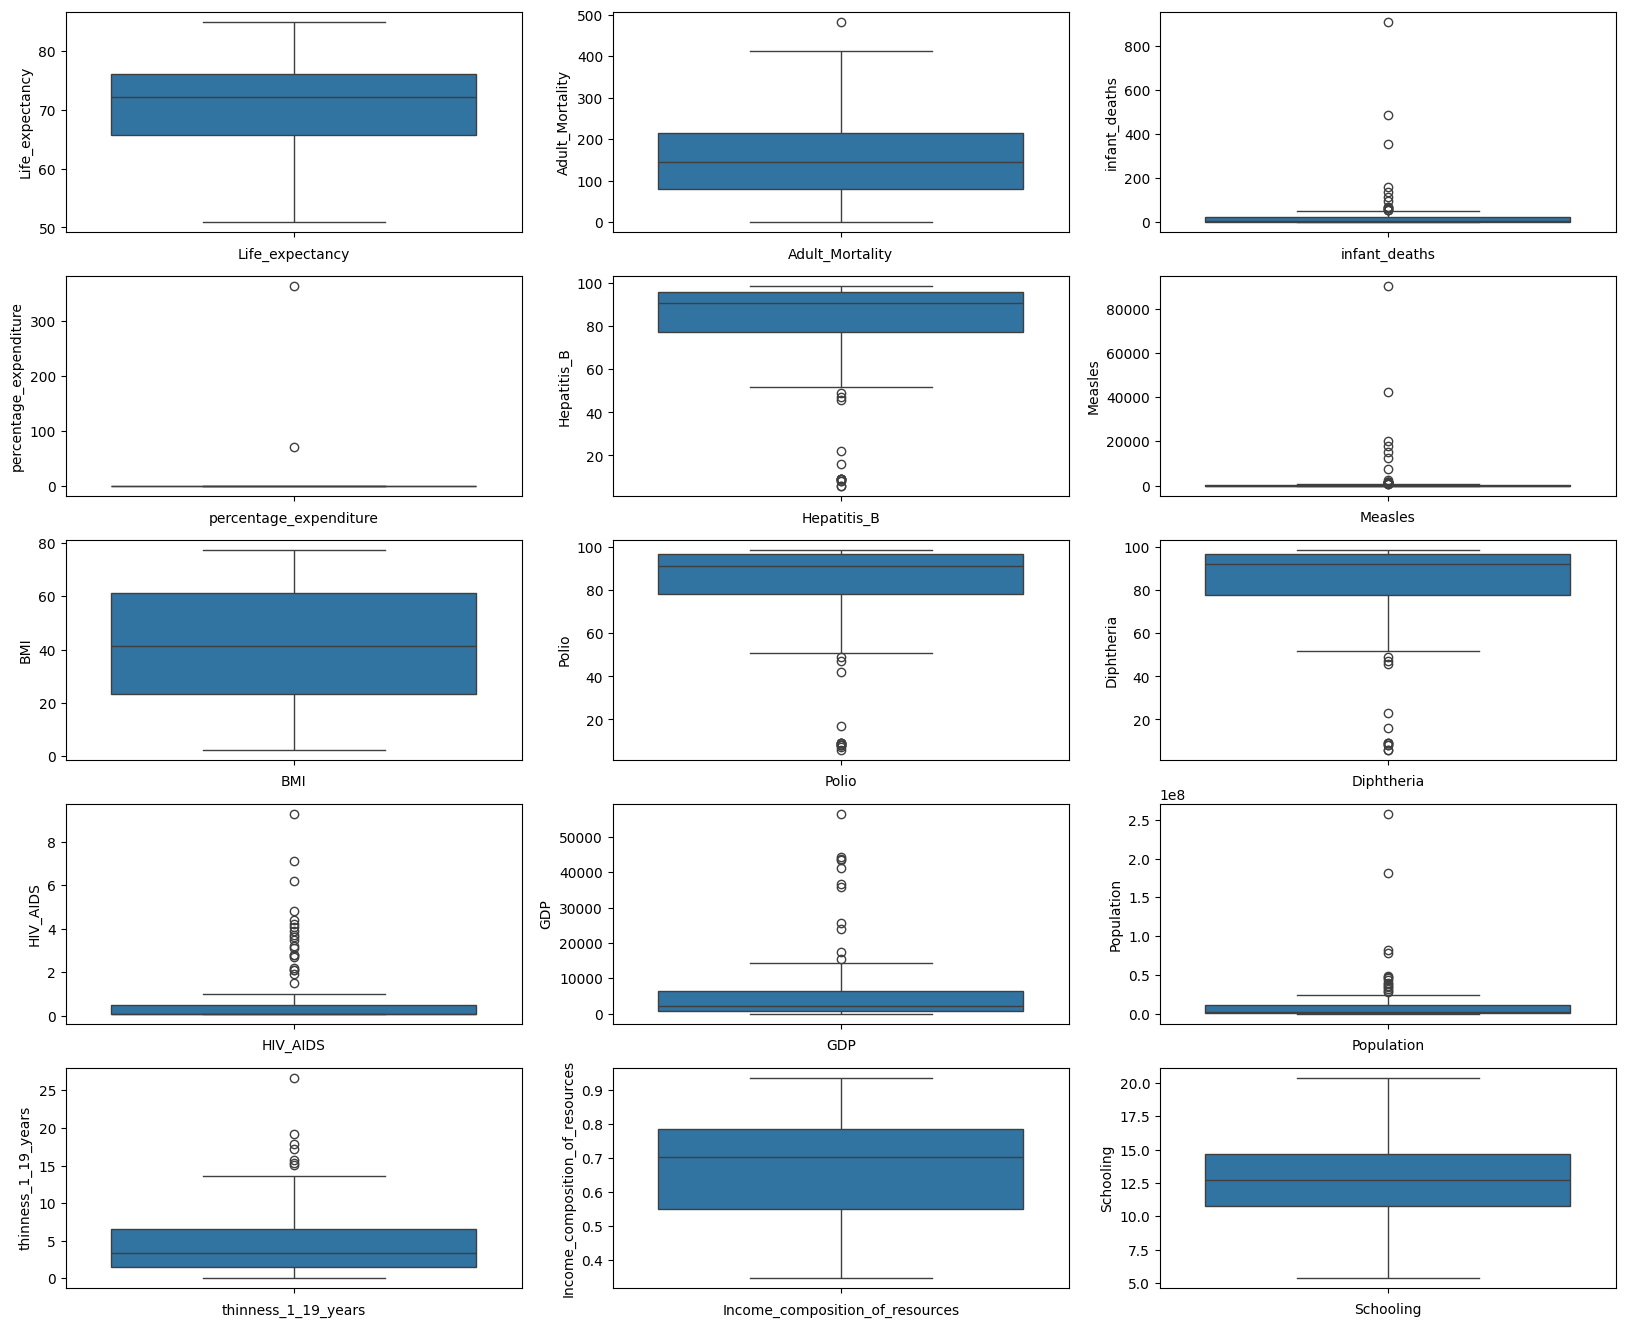

In [11]:
plt.figure(figsize=(20,20))
for i in range(15):
  plt.subplot(6, 3, i+1)
  sns.boxplot(df_n[df_n.columns[i]])
  plt.xlabel(df_n.columns[i])

Можно заметить, что есть много выбросов - избавимся от них, так как они сильно влияют на оценку МНК и могут повлиять на качество модели

In [12]:
# for i in range(15):
#     q1 = np.percentile(df_n.iloc[:, i], 25)
#     q3 = np.percentile(df_n.iloc[:, i], 75) 
#     df_n=df_n[df_n.iloc[:, i] < q3 + 1.5*(q3-q1)]
#     df_n=df_n[df_n.iloc[:, i] > q1 - 1.5*(q3-q1)]

In [13]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 0 to 2922
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life_expectancy                  130 non-null    float64
 1   Adult_Mortality                  130 non-null    float64
 2   infant_deaths                    130 non-null    int64  
 3   percentage_expenditure           130 non-null    float64
 4   Hepatitis_B                      130 non-null    float64
 5   Measles                          130 non-null    int64  
 6   BMI                              130 non-null    float64
 7   Polio                            130 non-null    float64
 8   Diphtheria                       130 non-null    float64
 9   HIV_AIDS                         130 non-null    float64
 10  GDP                              130 non-null    float64
 11  Population                       130 non-null    float64
 12  thinness_1_19_years       

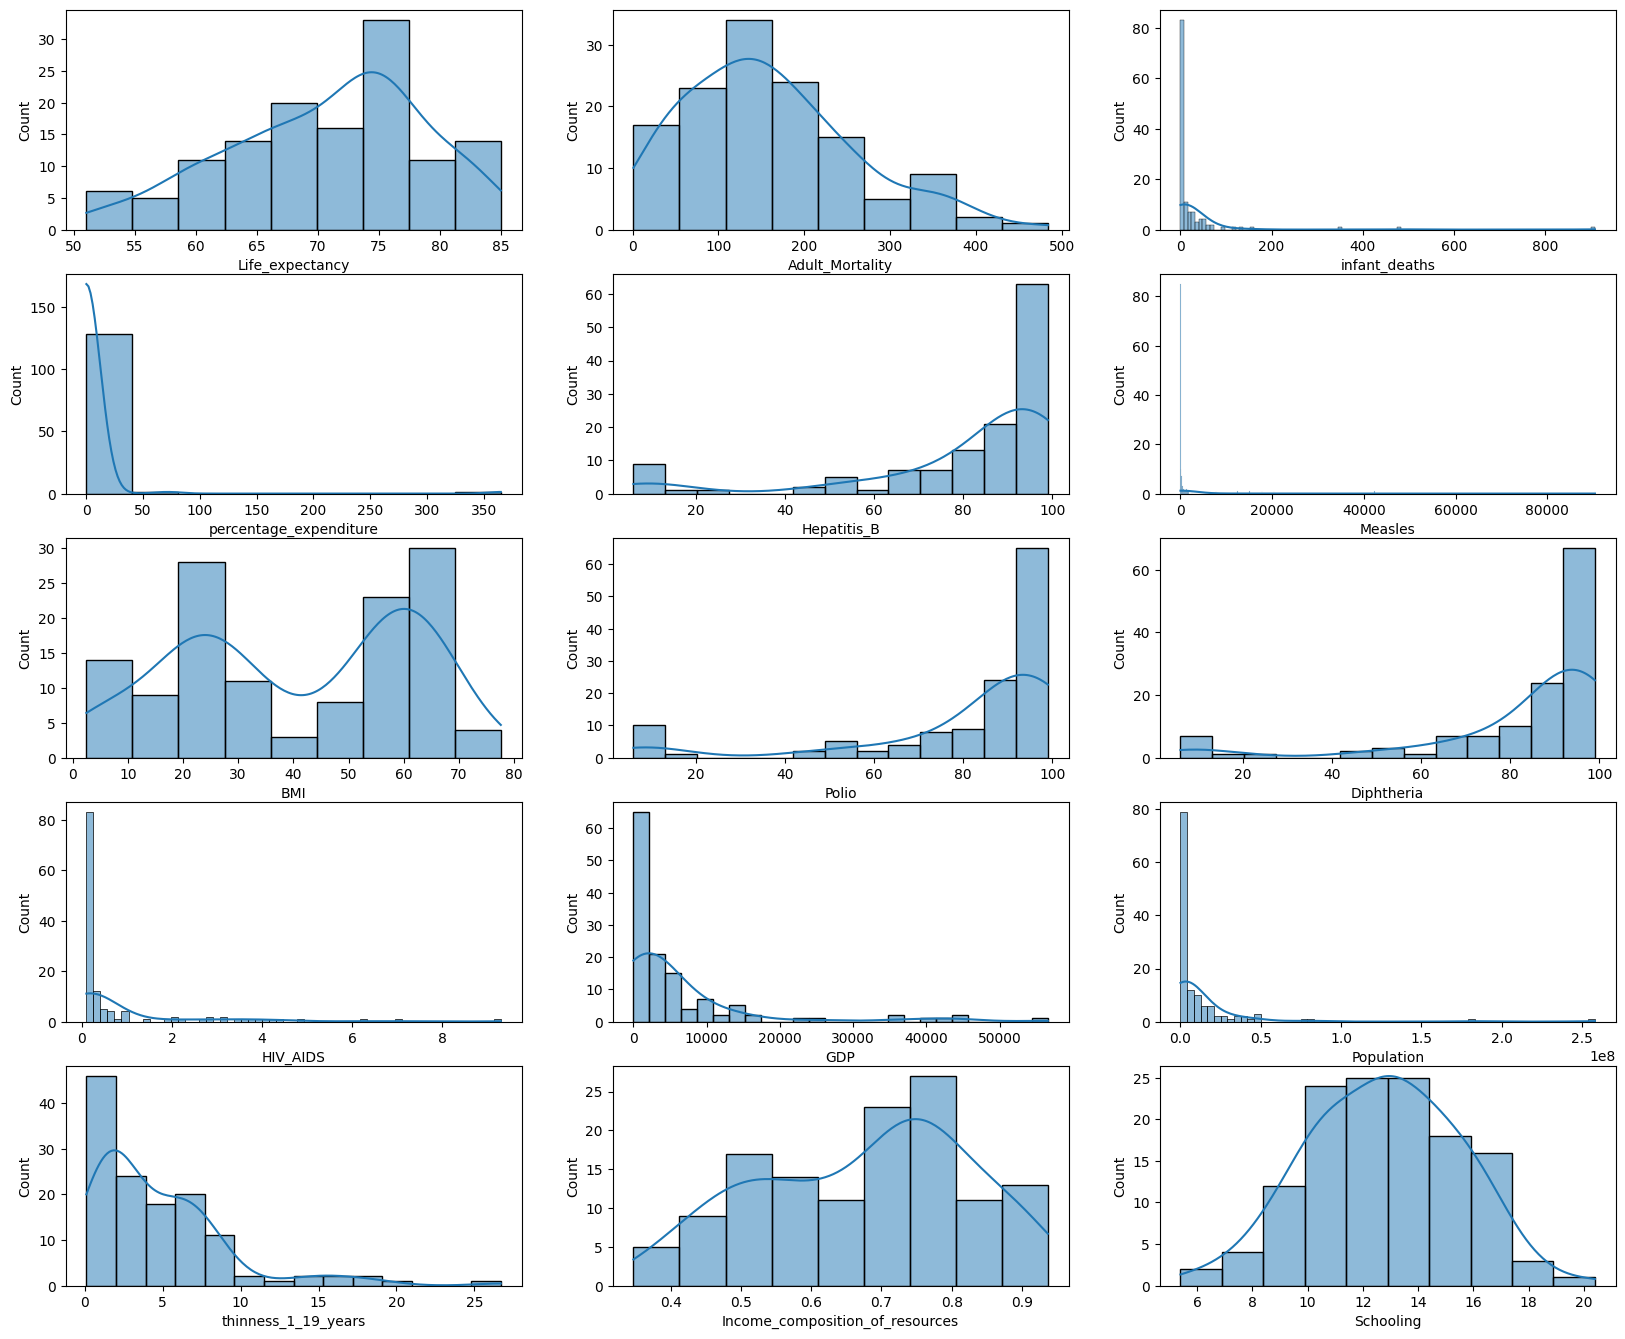

In [14]:
plt.figure(figsize=(20,20))
for i in range(1, 16):
  plt.subplot(6, 3, i)
  sns.histplot(df_n[df_n.columns[i-1]], kde=True)
  plt.xlabel(df_n.columns[i-1])

Проверим данные на нормальность 

Интерпреация коэффициентов эксцесса:

Если коэффициент эксцесса > 0, то распределение является более высоким, чем стандартное нормальноге распределение

Если коэффициент эксцесса < 0, то распределение является более низким, более пологим, чем нормальное распределение со стандартными параметрами.

In [15]:
#коэффициент эксцесса
df_n.skew()

Life_expectancy                    -0.435590
Adult_Mortality                     0.732454
infant_deaths                       7.185656
percentage_expenditure             10.848403
Hepatitis_B                        -1.952336
Measles                             8.030081
BMI                                -0.184155
Polio                              -1.989956
Diphtheria                         -2.200210
HIV_AIDS                            3.014927
GDP                                 3.038851
Population                          5.916936
thinness_1_19_years                 2.023207
Income_composition_of_resources    -0.258919
Schooling                          -0.052337
dtype: float64

Интерпретация коэффициента асимметрии:

Если A > 0, то распределение скошено вправо, если A < 0  – то влево. При этом если полученное значение по модулю меньше, чем 0,25, то асимметрия незначительна, если  0.25 < |A| < 0.5, то умеренная, и если |A|>0.5, то существенная.

In [16]:
#коэффициент асимметрии
df_n.kurtosis()

Life_expectancy                     -0.473248
Adult_Mortality                      0.270053
infant_deaths                       58.970890
percentage_expenditure             120.528122
Hepatitis_B                          2.955004
Measles                             72.413571
BMI                                 -1.362111
Polio                                3.013894
Diphtheria                           4.235381
HIV_AIDS                            10.332403
GDP                                  9.534729
Population                          41.715335
thinness_1_19_years                  5.681876
Income_composition_of_resources     -0.924350
Schooling                           -0.190764
dtype: float64

Проведем тестирование на нормальность распределения.

$H_0$: распределение нормально

$H_1$: распределение не нормально

In [17]:
cols = df_n.columns
for i in range(15):
   print(cols[i],'       ', stats.normaltest(df_n.iloc[:, i]))

Life_expectancy         NormaltestResult(statistic=5.845897801057178, pvalue=0.05377487649508612)
Adult_Mortality         NormaltestResult(statistic=11.05804982647664, pvalue=0.003969858158581466)
infant_deaths         NormaltestResult(statistic=215.84901646127685, pvalue=1.3458033756873541e-47)
percentage_expenditure         NormaltestResult(statistic=274.48471201369046, pvalue=2.4911627585819876e-60)
Hepatitis_B         NormaltestResult(statistic=56.77347990119794, pvalue=4.696728762088265e-13)
Measles         NormaltestResult(statistic=231.42307403782104, pvalue=5.586219289788382e-51)
BMI         NormaltestResult(statistic=122.08022344706481, pvalue=3.094683958359167e-27)
Polio         NormaltestResult(statistic=58.031581265429764, pvalue=2.5038150187495495e-13)
Diphtheria         NormaltestResult(statistic=68.48376244155489, pvalue=1.3456742305867998e-15)
HIV_AIDS         NormaltestResult(statistic=104.83420574535026, pvalue=1.7200515583963406e-23)
GDP         NormaltestResult(stat

При уровне значимости  p=0.05 , отвергаем предположение нормальности

Таким образом, нормальное распределение из выбранных данных имеют только переменные Life expectancy, Schooling, adult mortality,  Income composition of resources, однако оно все еще не нормальное..

Проведем еще тест Шапиро-Уилка.

$H_0$: Выборка полученна из нормального распределения

$H_1$: Выборка полученна не из нормального распределения

In [18]:
for i in range(15):
   print(cols[i],'       ', stats.shapiro(df_n.iloc[:, i]))

Life_expectancy         ShapiroResult(statistic=0.9672056436538696, pvalue=0.0030873878858983517)
Adult_Mortality         ShapiroResult(statistic=0.9556861519813538, pvalue=0.0003180943022016436)
infant_deaths         ShapiroResult(statistic=0.277055025100708, pvalue=1.540323366429561e-22)
percentage_expenditure         ShapiroResult(statistic=0.07973605394363403, pvalue=6.508366243438531e-25)
Hepatitis_B         ShapiroResult(statistic=0.6969553232192993, pvalue=4.9115806839933156e-15)
Measles         ShapiroResult(statistic=0.1908230185508728, pvalue=1.2440061951740339e-23)
BMI         ShapiroResult(statistic=0.9107385277748108, pvalue=2.998459649461438e-07)
Polio         ShapiroResult(statistic=0.6790836453437805, pvalue=1.7668189307768118e-15)
Diphtheria         ShapiroResult(statistic=0.670691967010498, pvalue=1.108765069164695e-15)
HIV_AIDS         ShapiroResult(statistic=0.5228351354598999, pvalue=9.507087667019763e-19)
GDP         ShapiroResult(statistic=0.5784101486206055, pva

По тесту Шапиро-Уилка нормально распределена на уровне значимости р = 0,05 только  переменные Schooling  Life expectancy, Adult Mortality, Income composition of resources 

# Корреляционный анализ 

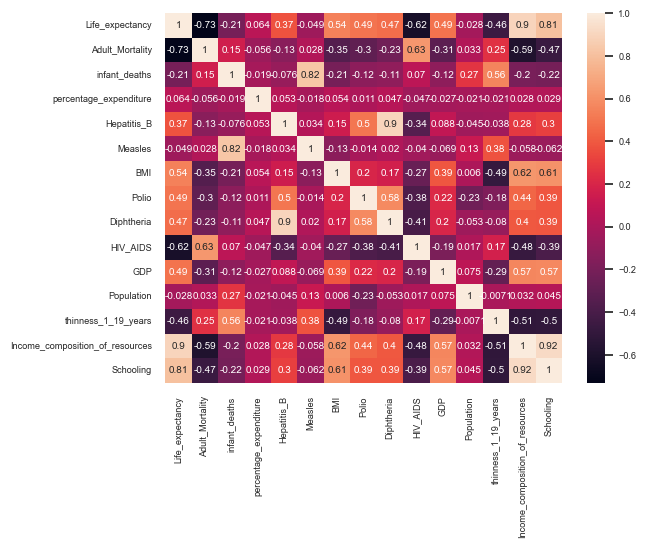

In [19]:
# но для проверки корреляции распределения по-хорошему должны быть распределены нормально
correlation_mat = df_n.corr()
sns.set (font_scale= 0.6 )
sns.heatmap(correlation_mat, annot = True)
plt.show()

Можно заметить что хорошо или умеренно коррелируют с результирующей переменной 'Life expectancy' переменные adult mortality, BMI, Polio, Diphtheria,   HIV/AIDS, GDP, thinness  1-19 years,Income composition of resources, Schooling

 Также между переменными встречаются показатели, которые говорят о том, что присутствует сильная корреляция между переменными  

# Мультиколлинеарность

Посмотрим на Vif модели - variance inflation factor

In [20]:
X=df_n.drop(columns ='Life_expectancy')
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Variable,VIF
0,Adult_Mortality,6.523864
1,infant_deaths,5.474308
2,percentage_expenditure,1.023457
3,Hepatitis_B,64.954329
4,Measles,3.789818
5,BMI,8.633566
6,Polio,20.176092
7,Diphtheria,89.134117
8,HIV_AIDS,2.405855
9,GDP,1.951469


# Линейная регрессия

In [21]:
m1=smf.ols('Life_expectancy~Adult_Mortality+percentage_expenditure+infant_deaths+Hepatitis_B+Measles+BMI+'\
          'Polio+Diphtheria+HIV_AIDS+GDP+Population+thinness_1_19_years+Income_composition_of_resources+Schooling',
          data=df_n)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     71.71
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           5.75e-50
Time:                        02:08:22   Log-Likelihood:                -306.36
No. Observations:                 130   AIC:                             642.7
Df Residuals:                     115   BIC:                             685.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [22]:
np.sum((fitted.resid)**2) # ошибки модели

847.9419547825999

Удалим переменные, которые имеют маленькие коэффициенты - эти переменные имеют  маленькую корреляцию с результирующей переменной.

In [23]:
m1=smf.ols('Life_expectancy~Adult_Mortality+percentage_expenditure+Hepatitis_B+BMI+'\
          'Polio+Diphtheria+HIV_AIDS+thinness_1_19_years+Income_composition_of_resources+Schooling',
          data=df_n)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     103.1
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           9.84e-54
Time:                        02:08:22   Log-Likelihood:                -306.82
No. Observations:                 130   AIC:                             635.6
Df Residuals:                     119   BIC:                             667.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [24]:
np.sum((fitted.resid)**2) 

853.9877110751203

Удалим незначимый индекс массы тела 

In [25]:
m1=smf.ols('Life_expectancy~Adult_Mortality+percentage_expenditure+Hepatitis_B+'\
          'Polio+Diphtheria+HIV_AIDS+thinness_1_19_years+Income_composition_of_resources+Schooling',
          data=df_n)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     115.2
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           9.99e-55
Time:                        02:08:22   Log-Likelihood:                -306.95
No. Observations:                 130   AIC:                             633.9
Df Residuals:                     120   BIC:                             662.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [26]:
np.sum((fitted.resid)**2) 

855.68210868355

Удалим дифтерию

In [27]:
m1=smf.ols('Life_expectancy~Adult_Mortality+percentage_expenditure+Hepatitis_B+'\
          'Polio+HIV_AIDS+thinness_1_19_years+Income_composition_of_resources+Schooling',
          data=df_n)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     130.5
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           9.07e-56
Time:                        02:08:22   Log-Likelihood:                -307.02
No. Observations:                 130   AIC:                             632.0
Df Residuals:                     121   BIC:                             657.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [28]:
np.sum((fitted.resid)**2) 

856.692459670825

соответственно удаляем schooling

## удаляем незначимые переменные

In [29]:
m1=smf.ols('Life_expectancy~Adult_Mortality+percentage_expenditure+Hepatitis_B+'\
          'Polio+HIV_AIDS+thinness_1_19_years+Income_composition_of_resources',
          data=df_n)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     150.4
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           7.30e-57
Time:                        02:08:22   Log-Likelihood:                -307.05
No. Observations:                 130   AIC:                             630.1
Df Residuals:                     122   BIC:                             653.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [30]:
np.sum((fitted.resid)**2)

857.0586998557645

In [31]:
#удалим полиомиелит
m1=smf.ols('Life_expectancy~Adult_Mortality+percentage_expenditure+Hepatitis_B+'\
          'HIV_AIDS+thinness_1_19_years+Income_composition_of_resources',
          data=df_n)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     175.0
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           9.24e-58
Time:                        02:08:22   Log-Likelihood:                -307.65
No. Observations:                 130   AIC:                             629.3
Df Residuals:                     123   BIC:                             649.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [32]:
np.sum((fitted.resid)**2)

865.0017539548364

In [33]:
#удалим percentage_expenditure
m1=smf.ols('Life_expectancy~Adult_Mortality+Hepatitis_B+'\
          'HIV_AIDS+thinness_1_19_years+Income_composition_of_resources',
          data=df_n)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     210.9
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           7.56e-59
Time:                        02:08:23   Log-Likelihood:                -307.89
No. Observations:                 130   AIC:                             627.8
Df Residuals:                     124   BIC:                             645.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [34]:
np.sum((fitted.resid)**2)

868.175701530259

In [35]:
#удалим thinness_1_19_years
m1=smf.ols('Life_expectancy~Adult_Mortality+Hepatitis_B+'\
          'HIV_AIDS+Income_composition_of_resources',
          data=df_n)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     261.6
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           1.04e-59
Time:                        02:08:23   Log-Likelihood:                -308.80
No. Observations:                 130   AIC:                             627.6
Df Residuals:                     125   BIC:                             641.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [36]:
np.sum((fitted.resid)**2)

880.4291380081905

In [37]:
#удалим HIV_AIDS
m1=smf.ols('Life_expectancy~Adult_Mortality+Hepatitis_B+'\
          '+Income_composition_of_resources',
          data=df_n)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     333.4
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           1.00e-59
Time:                        02:08:23   Log-Likelihood:                -311.87
No. Observations:                 130   AIC:                             631.7
Df Residuals:                     126   BIC:                             643.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [38]:
np.sum((fitted.resid)**2)

923.0448360032847

Итак, от мультиколлинеарности так до конца и не избавились, потому что переменные хорошо скоррелированы между собой(по хорошему дальше продолжать не стоит, а стоит взять другие данные)



**Анализ получившейся модели**

Durbin-Watson: 2.089 - для осутствия автокорреляции должен быть от 2 до 4

оставшиеся переменные:

  $\hat{y}$  =  47.1497-0.0255*Adult_Mortality+0.0453*Hepatitis_B+35.5445*Income_composition_of_resources

константа 47.1497 слишком большая по сравнению с другими константами перед переменными, это может говорить о том что данные не очень хорошо описывают модель

коэффициент детерминации равен 0.888 что говорит о том, что модель объясняет 74% исходных данных - показатель не самый плохой 



попробуем построить модель 

удалим gdp  и популяцию 

In [39]:
m1=smf.ols('Life_expectancy~Adult_Mortality+infant_deaths+Hepatitis_B+BMI+'\
          'Polio+Diphtheria+HIV_AIDS+thinness_1_19_years+Income_composition_of_resources',
          data=df_n)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     114.9
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           1.17e-54
Time:                        02:08:23   Log-Likelihood:                -307.12
No. Observations:                 130   AIC:                             634.2
Df Residuals:                     120   BIC:                             662.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [40]:
np.sum((fitted.resid)**2)

857.975794279799

In [41]:
m1=smf.ols('Life_expectancy~Adult_Mortality+Hepatitis_B+BMI+'\
          'Polio+Diphtheria+HIV_AIDS+thinness_1_19_years+Income_composition_of_resources',
          data=df_n)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     130.3
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           9.93e-56
Time:                        02:08:23   Log-Likelihood:                -307.12
No. Observations:                 130   AIC:                             632.2
Df Residuals:                     121   BIC:                             658.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [42]:
np.sum((fitted.resid)**2)

857.9793065149054

In [43]:
m1=smf.ols('Life_expectancy~Adult_Mortality+Hepatitis_B+BMI+'\
          'Polio+HIV_AIDS+thinness_1_19_years+Income_composition_of_resources',
          data=df_n)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     149.9
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           8.53e-57
Time:                        02:08:23   Log-Likelihood:                -307.22
No. Observations:                 130   AIC:                             630.4
Df Residuals:                     122   BIC:                             653.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [44]:
np.sum((fitted.resid)**2)

859.2625223748403

In [45]:
m1=smf.ols('Life_expectancy~Adult_Mortality+Hepatitis_B+'\
          'Polio+HIV_AIDS+thinness_1_19_years+Income_composition_of_resources',
          data=df_n)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     176.0
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           6.73e-58
Time:                        02:08:23   Log-Likelihood:                -307.31
No. Observations:                 130   AIC:                             628.6
Df Residuals:                     123   BIC:                             648.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [46]:
np.sum((fitted.resid)**2)

860.5329049562903

In [47]:
m1=smf.ols('Life_expectancy~Adult_Mortality+Hepatitis_B+'\
          'HIV_AIDS+thinness_1_19_years+Income_composition_of_resources',
          data=df_n)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     210.9
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           7.56e-59
Time:                        02:08:23   Log-Likelihood:                -307.89
No. Observations:                 130   AIC:                             627.8
Df Residuals:                     124   BIC:                             645.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [48]:
np.sum((fitted.resid)**2)

868.175701530259

In [49]:
m1=smf.ols('Life_expectancy~Adult_Mortality+Hepatitis_B+'\
          'HIV_AIDS+Income_composition_of_resources',
          data=df_n)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     261.6
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           1.04e-59
Time:                        02:08:23   Log-Likelihood:                -308.80
No. Observations:                 130   AIC:                             627.6
Df Residuals:                     125   BIC:                             641.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [50]:
np.sum((fitted.resid)**2)

880.4291380081905

In [51]:
m1=smf.ols('Life_expectancy~Adult_Mortality+Hepatitis_B+Income_composition_of_resources',
          data=df_n)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     333.4
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           1.00e-59
Time:                        02:08:23   Log-Likelihood:                -311.87
No. Observations:                 130   AIC:                             631.7
Df Residuals:                     126   BIC:                             643.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

Удалили все незначимые переменные, но от мультиколлинеарности так и не избавились - это плохо, но продолжим исследование 

# Логарифмируем результирующую переменную 

In [52]:
m1=smf.ols('np.log(Life_expectancy)~Adult_Mortality+Hepatitis_B+Income_composition_of_resources',
          data=df_n)
fitted=m1.fit()
print(fitted.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log(Life_expectancy)   R-squared:                       0.880
Model:                                 OLS   Adj. R-squared:                  0.878
Method:                      Least Squares   F-statistic:                     309.5
Date:                     Sun, 19 Nov 2023   Prob (F-statistic):           6.34e-58
Time:                             02:08:23   Log-Likelihood:                 232.61
No. Observations:                      130   AIC:                            -457.2
Df Residuals:                          126   BIC:                            -445.8
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

R2 уменьшился, а значит нет смысла так логарифмировать 

In [53]:
m1=smf.ols('np.log(Life_expectancy)~np.log(Adult_Mortality)+Hepatitis_B+Income_composition_of_resources',
          data=df_n)
fitted=m1.fit()
print(fitted.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log(Life_expectancy)   R-squared:                       0.834
Model:                                 OLS   Adj. R-squared:                  0.830
Method:                      Least Squares   F-statistic:                     210.3
Date:                     Sun, 19 Nov 2023   Prob (F-statistic):           7.24e-49
Time:                             02:08:23   Log-Likelihood:                 211.06
No. Observations:                      130   AIC:                            -414.1
Df Residuals:                          126   BIC:                            -402.7
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [54]:
m1=smf.ols('np.log(Life_expectancy)~np.log(Adult_Mortality)+np.log(Hepatitis_B)+Income_composition_of_resources',
          data=df_n)
fitted=m1.fit()
print(fitted.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log(Life_expectancy)   R-squared:                       0.830
Model:                                 OLS   Adj. R-squared:                  0.826
Method:                      Least Squares   F-statistic:                     204.6
Date:                     Sun, 19 Nov 2023   Prob (F-statistic):           3.01e-48
Time:                             02:08:24   Log-Likelihood:                 209.59
No. Observations:                      130   AIC:                            -411.2
Df Residuals:                          126   BIC:                            -399.7
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [55]:
m1=smf.ols('np.log(Life_expectancy)~np.log(Adult_Mortality)+Hepatitis_B+np.log(Income_composition_of_resources)',
          data=df_n)
fitted=m1.fit()
print(fitted.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log(Life_expectancy)   R-squared:                       0.832
Model:                                 OLS   Adj. R-squared:                  0.827
Method:                      Least Squares   F-statistic:                     207.3
Date:                     Sun, 19 Nov 2023   Prob (F-statistic):           1.55e-48
Time:                             02:08:24   Log-Likelihood:                 210.28
No. Observations:                      130   AIC:                            -412.6
Df Residuals:                          126   BIC:                            -401.1
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

# Исследование ошибок

Для дальнейшего анализа возьмем модель, которая лучшим образом, на данный момент описывает данные, хоть она и с мультиколлинеарностью

In [56]:
m1=smf.ols('Life_expectancy~Adult_Mortality+Hepatitis_B+Income_composition_of_resources',
          data=df_n)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     333.4
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           1.00e-59
Time:                        02:08:24   Log-Likelihood:                -311.87
No. Observations:                 130   AIC:                             631.7
Df Residuals:                     126   BIC:                             643.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [57]:
fitted.ess

7327.550856304407

In [58]:
fitted.centered_tss

8250.595692307692

In [59]:
R_sqd=fitted.ess/fitted.centered_tss
R_sqd

0.888123855485505

In [60]:
fitted.fittedvalues

0       60.413735
16      76.830801
32      77.376524
48      60.381173
80      77.808481
          ...    
2810    76.716338
2826    71.716028
2842    70.971841
2906    67.189541
2922    60.544065
Length: 130, dtype: float64

In [61]:
df_n.Life_expectancy

0       65.0
16      77.8
32      75.6
48      52.4
80      76.3
        ... 
2810    77.0
2826    69.4
2842    72.0
2906    61.8
2922    67.0
Name: Life_expectancy, Length: 130, dtype: float64

In [62]:
df_n.Life_expectancy-fitted.fittedvalues

0       4.586265
16      0.969199
32     -1.776524
48     -7.981173
80     -1.508481
          ...   
2810    0.283662
2826   -2.316028
2842    1.028159
2906   -5.389541
2922    6.455935
Length: 130, dtype: float64

In [63]:
fitted.resid

0       4.586265
16      0.969199
32     -1.776524
48     -7.981173
80     -1.508481
          ...   
2810    0.283662
2826   -2.316028
2842    1.028159
2906   -5.389541
2922    6.455935
Length: 130, dtype: float64

<Axes: ylabel='Count'>

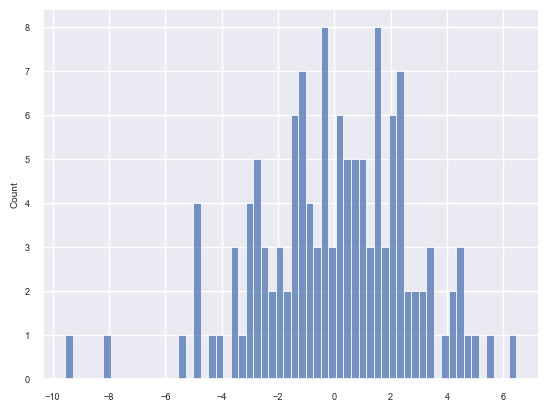

In [64]:
sns.histplot(fitted.resid, kde=False, bins=60)

У ошибок должно быть нормальное распределнеие, но на графике видно, что на нормальное распределение это не особо похоже

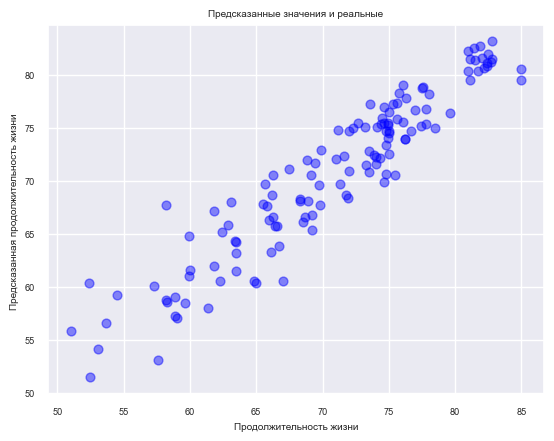

In [65]:
plt.scatter(df_n.Life_expectancy, fitted.fittedvalues, color='blue', s=40, alpha=0.45)
plt.title('Предсказанные значения и реальные')
plt.xlabel('Продолжительность жизни')
plt.ylabel('Предсказанная продолжительность жизни ')
plt.show()

Видно, что в принципе образовывается прямая, что может говорить о том, что модель нормально предсказывает 

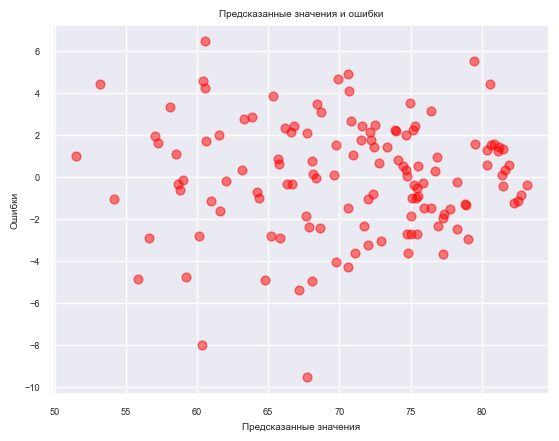

In [66]:
plt.scatter(fitted.fittedvalues, fitted.resid, color='red', s=40, alpha=0.5)
plt.title('Предсказанные значения и ошибки')
plt.xlabel('Предсказанные значения')
plt.ylabel('Ошибки')
plt.show()

ошибки на графике находятся в облаке, а не в конусе, будто бы гетероскедастичности не должно быть 

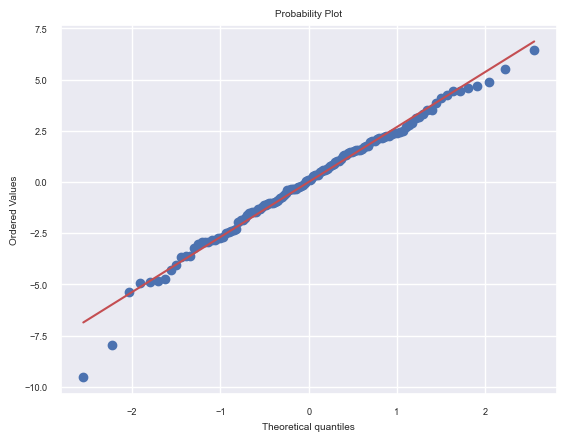

In [67]:
sc.stats.probplot(fitted.resid, dist='norm', plot=pylab)
plt.show()

На графике видно, что распределение ошибок соответствует (хоть и с некоторыми колебаниями) нормальному 

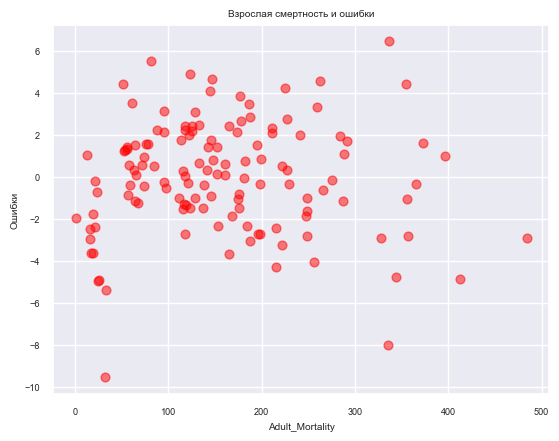

In [69]:
plt.scatter(df_n.Adult_Mortality, fitted.resid, color='red', s=40, alpha=0.5)
plt.title('Взрослая смертность и ошибки')
plt.xlabel('Adult_Mortality')
plt.ylabel('Ошибки')
plt.show()

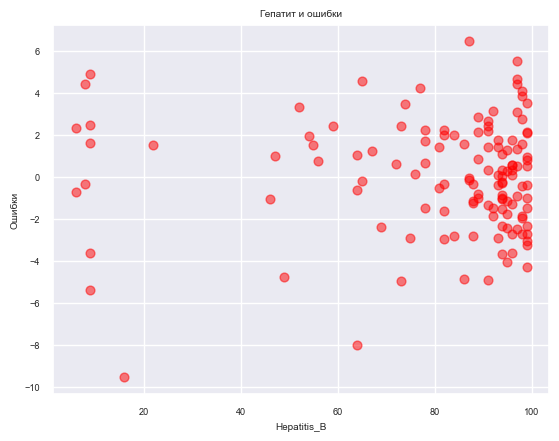

In [70]:
plt.scatter(df_n.Hepatitis_B, fitted.resid, color='red', s=40, alpha=0.5)
plt.title('Гепатит и ошибки')
plt.xlabel('Hepatitis_B')
plt.ylabel('Ошибки')
plt.show()

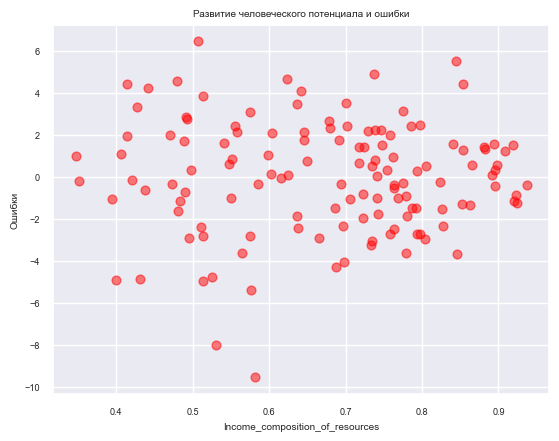

In [71]:
plt.scatter(df_n.Income_composition_of_resources, fitted.resid, color='red', s=40, alpha=0.5)
plt.title('Развитие человеческого потенциала и ошибки')
plt.xlabel('Income_composition_of_resources')
plt.ylabel('Ошибки')
plt.show()

**Тесты на гетероскедастичность**

Н0: ошибки гомоскедастичны

Н1: присутствует гетероскедастичность

In [74]:
# Критерий Бройша-Пагана для проверки гомоскедастичности ошибок

from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(fitted.resid, fitted.model.exog)

labels = ['Статистика теста Лагранжа', 'p-value', 'F-Statistic', 'F-Test p-value']

for name, value in zip(labels, bp_test):
    print(f"{name}: {value}")

# p-value меньше уровня значимости 0.05 => отвергаем нулевую гипотезу о гомоскедастичности
# => гетероскедастичность присутствует

Статистика теста Лагранжа: 13.031033482345661
p-value: 0.004569972126598085
F-Statistic: 4.679047977874645
F-Test p-value: 0.003917492051701245


Н0: ошибки гомоскедастичны

Н1: присутствует гетероскедастичность

In [75]:
# Критерий Уайта для проверки гомоскедастичности ошибок

from statsmodels.stats.diagnostic import het_white

het_white_test = het_white(fitted.resid, fitted.model.exog)

labels = ['Статистика теста', 'p-value', 'F-статистика', 'F-Test p-value']

for name, value in zip(labels, het_white_test):
    print(f"{name}: {value}")
# p-value меньше уровня значимости 0.05 => отвергаем нулевую гипотезу о гомоскедастичности
# =>  что гетероскедастичность присутствует

Статистика теста: 24.132188715365125
p-value: 0.004097143324297448
F-статистика: 3.0392856176064864
F-Test p-value: 0.0026150115440515863


Так как в обоих случаях вышло так, что гетероскедастичность есть 

In [77]:
#поправка Уайта 
m1=smf.ols('Life_expectancy~Adult_Mortality+Hepatitis_B+Income_composition_of_resources',
          data=df_n)
fitted=m1.fit(cov_type='HC1')
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     343.2
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           1.97e-60
Time:                        02:19:07   Log-Likelihood:                -311.87
No. Observations:                 130   AIC:                             631.7
Df Residuals:                     126   BIC:                             643.2
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [85]:
#Данные после поправки Уайта

<Axes: ylabel='Count'>

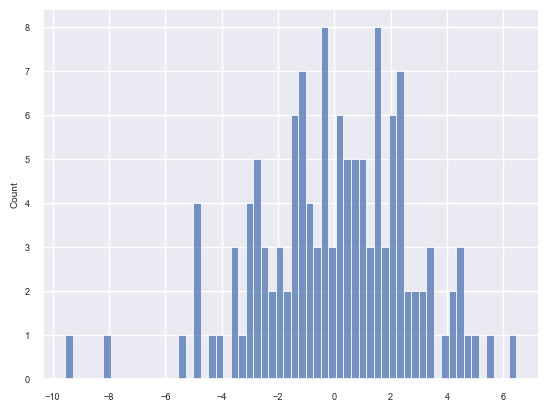

In [78]:
sns.histplot(fitted.resid, kde=False, bins=60)

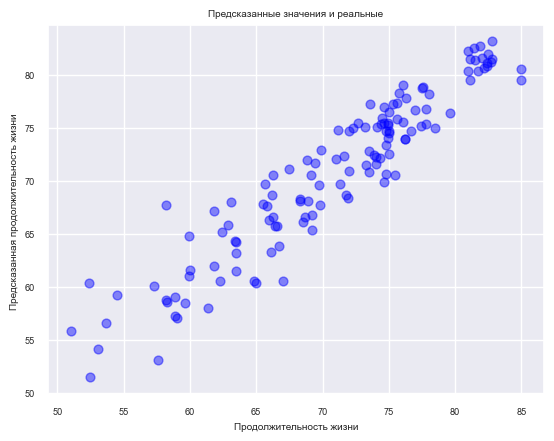

In [79]:
plt.scatter(df_n.Life_expectancy, fitted.fittedvalues, color='blue', s=40, alpha=0.45)
plt.title('Предсказанные значения и реальные')
plt.xlabel('Продолжительность жизни')
plt.ylabel('Предсказанная продолжительность жизни ')
plt.show()

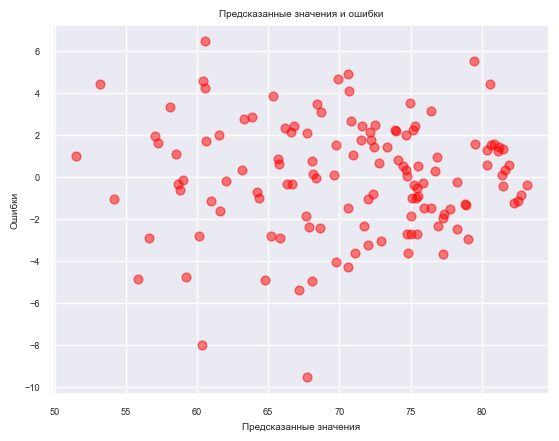

In [80]:
plt.scatter(fitted.fittedvalues, fitted.resid, color='red', s=40, alpha=0.5)
plt.title('Предсказанные значения и ошибки')
plt.xlabel('Предсказанные значения')
plt.ylabel('Ошибки')
plt.show()

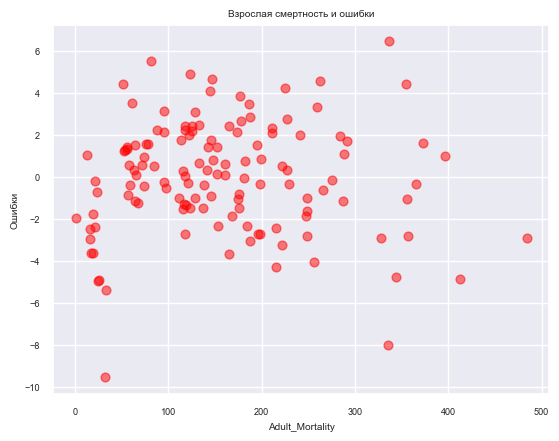

In [82]:
plt.scatter(df_n.Adult_Mortality, fitted.resid, color='red', s=40, alpha=0.5)
plt.title('Взрослая смертность и ошибки')
plt.xlabel('Adult_Mortality')
plt.ylabel('Ошибки')
plt.show()

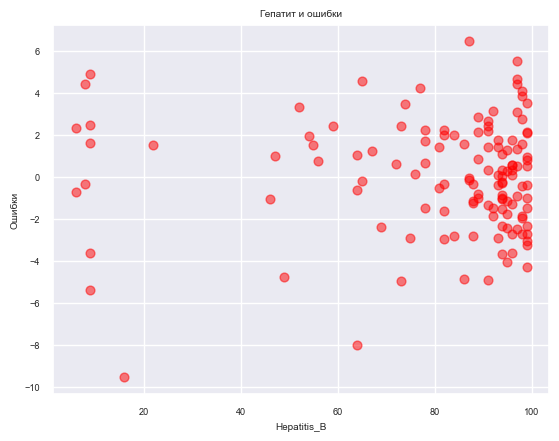

In [83]:
plt.scatter(df_n.Hepatitis_B, fitted.resid, color='red', s=40, alpha=0.5)
plt.title('Гепатит и ошибки')
plt.xlabel('Hepatitis_B')
plt.ylabel('Ошибки')
plt.show()

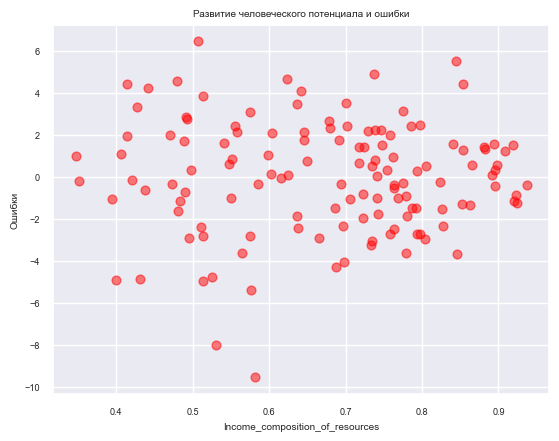

In [84]:
plt.scatter(df_n.Income_composition_of_resources, fitted.resid, color='red', s=40, alpha=0.5)
plt.title('Развитие человеческого потенциала и ошибки')
plt.xlabel('Income_composition_of_resources')
plt.ylabel('Ошибки')
plt.show()

# Регуляризация 

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LassoCV

Для начала перейдем к нормированным данным

In [93]:
scaler = MinMaxScaler()
scaler.fit(df_n)
data_std=scaler.transform(df_n)

In [94]:
data_std

array([[0.41176471, 0.54244306, 0.06813187, ..., 0.64285714, 0.22372881,
        0.31333333],
       [0.78823529, 0.15113872, 0.        , ..., 0.04135338, 0.70338983,
        0.58666667],
       [0.72352941, 0.03726708, 0.02307692, ..., 0.22180451, 0.67118644,
        0.6       ],
       ...,
       [0.61764706, 0.02484472, 0.        , ..., 0.05263158, 0.42542373,
        0.36      ],
       [0.31764706, 0.06625259, 0.02967033, ..., 0.23308271, 0.38813559,
        0.47333333],
       [0.47058824, 0.69358178, 0.02417582, ..., 0.20676692, 0.27118644,
        0.32666667]])

In [98]:
data_norm = pd.DataFrame(data_std)
data_norm.columns=df_n.columns

In [99]:
data_norm

,Life_expectancy,Adult_Mortality,infant_deaths,percentage_expenditure,Hepatitis_B,Measles,BMI,Polio,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_19_years,Income_composition_of_resources,Schooling
0,0.411765,0.542443,0.068132,0.1953,0.634409,0.012767,0.221039,0.000000,0.634409,0.000000,0.009741,0.130670,0.642857,0.223729,0.313333
1,0.788235,0.151139,0.000000,1.0000,1.000000,0.000000,0.739015,1.000000,1.000000,0.000000,0.069365,0.000100,0.041353,0.703390,0.586667
2,0.723529,0.037267,0.023077,0.0000,0.956989,0.000697,0.758988,0.956989,0.956989,0.000000,0.072524,0.154434,0.221805,0.671186,0.600000
3,0.041176,0.691511,0.072527,0.0000,0.623656,0.001305,0.276964,0.010753,0.623656,0.195652,0.064792,0.010780,0.308271,0.311864,0.400000
4,0.744118,0.238095,0.008791,0.0000,0.946237,0.000000,0.802929,0.935484,0.946237,0.000000,0.237673,0.168171,0.033835,0.811864,0.793333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.764706,0.238095,0.000000,0.0000,0.956989,0.000000,0.818908,0.956989,0.956989,0.000000,0.274079,0.013281,0.052632,0.757627,0.673333
126,0.541176,0.378882,0.016484,0.0000,1.000000,0.000243,0.561917,1.000000,1.000000,0.000000,0.037223,0.001201,0.109023,0.593220,0.446667
127,0.617647,0.024845,0.000000,0.0000,0.623656,0.000431,0.676431,0.634409,0.623656,0.000000,0.004461,0.000091,0.052632,0.425424,0.360000
128,0.317647,0.066253,0.029670,0.0000,0.032258,0.000100,0.278296,0.032258,0.032258,0.434783,0.022650,0.000614,0.233083,0.388136,0.473333


In [100]:
X_norm=data_norm.drop(columns='Life_expectancy')

In [101]:
y_norm=data_norm.Life_expectancy

In [102]:
X_norm

,Adult_Mortality,infant_deaths,percentage_expenditure,Hepatitis_B,Measles,BMI,Polio,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_19_years,Income_composition_of_resources,Schooling
0,0.542443,0.068132,0.1953,0.634409,0.012767,0.221039,0.000000,0.634409,0.000000,0.009741,0.130670,0.642857,0.223729,0.313333
1,0.151139,0.000000,1.0000,1.000000,0.000000,0.739015,1.000000,1.000000,0.000000,0.069365,0.000100,0.041353,0.703390,0.586667
2,0.037267,0.023077,0.0000,0.956989,0.000697,0.758988,0.956989,0.956989,0.000000,0.072524,0.154434,0.221805,0.671186,0.600000
3,0.691511,0.072527,0.0000,0.623656,0.001305,0.276964,0.010753,0.623656,0.195652,0.064792,0.010780,0.308271,0.311864,0.400000
4,0.238095,0.008791,0.0000,0.946237,0.000000,0.802929,0.935484,0.946237,0.000000,0.237673,0.168171,0.033835,0.811864,0.793333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.238095,0.000000,0.0000,0.956989,0.000000,0.818908,0.956989,0.956989,0.000000,0.274079,0.013281,0.052632,0.757627,0.673333
126,0.378882,0.016484,0.0000,1.000000,0.000243,0.561917,1.000000,1.000000,0.000000,0.037223,0.001201,0.109023,0.593220,0.446667
127,0.024845,0.000000,0.0000,0.623656,0.000431,0.676431,0.634409,0.623656,0.000000,0.004461,0.000091,0.052632,0.425424,0.360000
128,0.066253,0.029670,0.0000,0.032258,0.000100,0.278296,0.032258,0.032258,0.434783,0.022650,0.000614,0.233083,0.388136,0.473333


In [103]:
y_norm

0      0.411765
1      0.788235
2      0.723529
3      0.041176
4      0.744118
         ...   
125    0.764706
126    0.541176
127    0.617647
128    0.317647
129    0.470588
Name: Life_expectancy, Length: 130, dtype: float64

In [104]:
#обычная регрессия
model=LinearRegression()
model.fit(X_norm, y_norm)

print (model.intercept_)
print (model.coef_)

0.2942220381281482
[-0.2962426   0.01080942  0.05555325  0.11932679  0.01270804 -0.01790201
  0.02568    -0.03031659 -0.14118956  0.01057745 -0.05783462 -0.07745142
  0.60485327 -0.02262569]


In [105]:
m1=smf.ols('y_norm~ X_norm',
          data=data_norm)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                 y_norm   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     71.71
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           5.75e-50
Time:                        02:34:03   Log-Likelihood:                 152.07
No. Observations:                 130   AIC:                            -274.1
Df Residuals:                     115   BIC:                            -231.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2942      0.044      6.677      0.0

коэффициенты получились одинаковые 

**регуляризация Лассо**

cv означает количество кросс-валидаций 

In [111]:
reg1=LassoCV(cv=5, random_state=8).fit(X_norm,y_norm)  
coef = reg1.coef_ #вывод коэффициентов 
coef

array([-0.28224185, -0.        ,  0.        ,  0.07740899, -0.        ,
        0.        ,  0.02801048,  0.        , -0.08968278,  0.        ,
       -0.        , -0.        ,  0.59853105,  0.        ])

In [112]:
result1=pd.DataFrame(reg1.coef_)
result1['factors']=X_norm.columns
result1

,0,factors
0,-0.282242,Adult_Mortality
1,-0.000000,infant_deaths
2,0.000000,percentage_expenditure
3,0.077409,Hepatitis_B
4,-0.000000,Measles
5,0.000000,BMI
6,0.028010,Polio
7,0.000000,Diphtheria
8,-0.089683,HIV_AIDS
9,0.000000,GDP


y = -0.282242*Adult_Mortality + 0.077409*Hepatitis_B + 0.028010*Polio - 0.089683*HIV_AIDS + 0.598531*Income_composition_of_resources

In [113]:
m1=smf.ols('Life_expectancy~Adult_Mortality+Hepatitis_B+Income_composition_of_resources',
          data=df_n)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     333.4
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           1.00e-59
Time:                        03:00:32   Log-Likelihood:                -311.87
No. Observations:                 130   AIC:                             631.7
Df Residuals:                     126   BIC:                             643.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [114]:
reg1.score(X_norm,y_norm) #R2

0.8914420030245664

Резулязация Лассо оставила больше переменных, чем при построении линейной регрессии вручную  и имеет R2 чуточку выше

**Регулязация Ридж**

In [115]:
from sklearn.linear_model import RidgeCV
reg2=RidgeCV(alphas=[0.09, 0.11, 0.5, 1]).fit(X_norm,y_norm)

In [116]:
reg2.alpha_

0.5

In [117]:
result2=pd.DataFrame(reg2.coef_)
result2['factors']=X_norm.columns
result2

,0,factors
0,-0.295031,Adult_Mortality
1,0.003622,infant_deaths
2,0.038054,percentage_expenditure
3,0.073438,Hepatitis_B
4,0.014658,Measles
5,0.006319,BMI
6,0.042902,Polio
7,0.018127,Diphtheria
8,-0.146671,HIV_AIDS
9,0.022158,GDP


In [118]:
reg2.score(X_norm,y_norm)

0.8933084661505051

Посмотрим какие vifы получились после удаления переменных, которые предложила регулязация Лассо

In [119]:
X=df_n.drop(columns ='Life_expectancy')
X=X.drop(columns ='infant_deaths')
X=X.drop(columns ='BMI')
X=X.drop(columns ='Diphtheria')
X=X.drop(columns ='GDP')
X=X.drop(columns ='Population')
X=X.drop(columns ='Polio')
X=X.drop(columns ='HIV_AIDS')
X=X.drop(columns ='thinness_1_19_years')
X=X.drop(columns ='Schooling')
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Variable,VIF
0,Adult_Mortality,2.672485
1,percentage_expenditure,1.016335
2,Hepatitis_B,11.742411
3,Measles,1.041700
4,Income_composition_of_resources,10.399574


In [120]:
X=df_n.drop(columns ='Life_expectancy')
X=X.drop(columns ='infant_deaths')
X=X.drop(columns ='BMI')
X=X.drop(columns ='Diphtheria')
X=X.drop(columns ='GDP')
X=X.drop(columns ='Population')
X=X.drop(columns ='Schooling')
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Variable,VIF
0,Adult_Mortality,5.820457
1,percentage_expenditure,1.017079
2,Hepatitis_B,16.521335
3,Measles,1.223876
4,Polio,17.414666
5,HIV_AIDS,2.379499
6,thinness_1_19_years,2.659894
7,Income_composition_of_resources,15.681543


vifы большие, но видимо это оптимальный вариант 

# Выбор модели с регуляцией и исследование ее ошибок 

Для дальнейшего анализа будет использоваться модеь построенная с регулязацией Lasso, так как она избавляет от лишнего шума в данных и разрежевает их, что будет хорошо, так как данные с сильной мультиколлинеарностью, и удаление некоторых переменных поможет избавиться от нее и от переменных которые очень незначительно влияет на результирующую переменную

In [122]:
y_progrosed = np.matmul(data_std[:,1:15], coef)
resid = data_std[:,0]-np.matmul(data_std[:,1:15], coef)
resid

array([0.38184727, 0.30447284, 0.23143652, 0.01865826, 0.22594146,
       0.26831801, 0.27203725, 0.28295874, 0.18704041, 0.35211259,
       0.1774785 , 0.26744092, 0.22694461, 0.19751636, 0.31371993,
       0.33778568, 0.14457195, 0.27276974, 0.22203038, 0.13214455,
       0.26689412, 0.31845026, 0.31512328, 0.16893708, 0.30780408,
       0.27096261, 0.20070106, 0.4392805 , 0.28930557, 0.30417561,
       0.25669854, 0.36443223, 0.26641227, 0.41231863, 0.31419288,
       0.30052887, 0.32845533, 0.33373138, 0.01981236, 0.23089188,
       0.36641285, 0.16714085, 0.31931752, 0.22408494, 0.2370967 ,
       0.2414038 , 0.16181496, 0.29542953, 0.37403846, 0.28580032,
       0.25579754, 0.17887028, 0.22485931, 0.39823944, 0.25159075,
       0.23213045, 0.26708605, 0.24876126, 0.29909385, 0.32415275,
       0.33366071, 0.23915832, 0.17602951, 0.23773287, 0.25880014,
       0.19493118, 0.2543996 , 0.22787797, 0.33114387, 0.15487374,
       0.2897986 , 0.20230469, 0.2524537 , 0.22539165, 0.37934

In [123]:
data_norm['Life_expectancy'] - (-0.282242*data_norm['Adult_Mortality']+0.077409*data_norm['Hepatitis_B']+0.028010*data_norm['Polio']-0.089683*data_norm['HIV_AIDS']+0.598531*data_norm['Income_composition_of_resources'])

0      0.381847
1      0.304473
2      0.231437
3      0.018658
4      0.225942
         ...   
125    0.277558
126    0.187633
127    0.303984
128    0.139627
129    0.471379
Length: 130, dtype: float64

In [124]:
resid_df = pd.DataFrame(data=resid)

<Axes: ylabel='Count'>

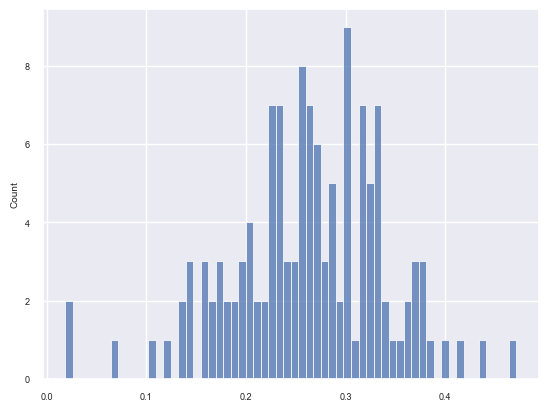

In [125]:
sns.histplot(resid, kde=False, bins=60)

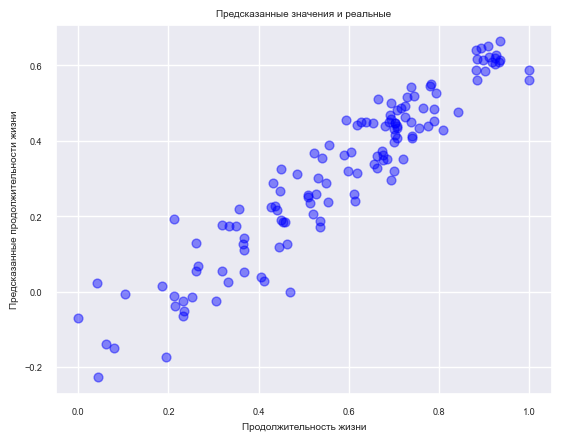

In [126]:
plt.scatter(data_norm.Life_expectancy, y_progrosed, color='blue', s=40, alpha=0.45)
plt.title('Предсказанные значения и реальные')
plt.xlabel('Продолжительность жизни')
plt.ylabel('Предсказанные продолжительности жизни')
plt.show()

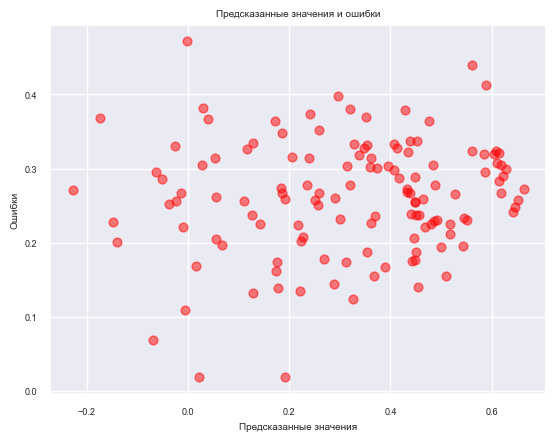

In [127]:
plt.scatter( y_progrosed, resid, color='red', s=40, alpha=0.5)
plt.title('Предсказанные значения и ошибки')
plt.xlabel('Предсказанные значения')
plt.ylabel('Ошибки')
plt.show()

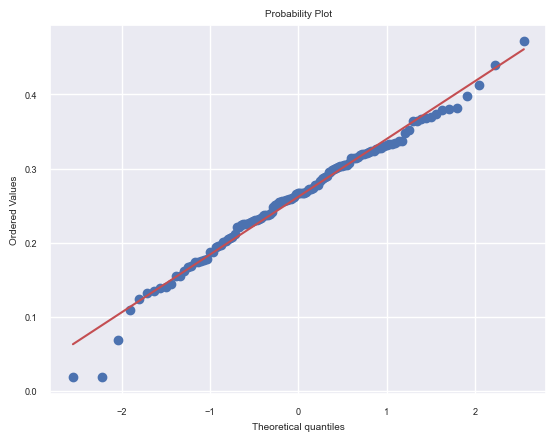

In [128]:
sc.stats.probplot(resid, dist='norm', plot=pylab)
plt.show()